In [1]:
import pandas as pd
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
plt.close(fig)

In [2]:
df = pd.read_csv('hotel_bookings.csv')


In [3]:
# Calculate the count of each reservation status
reservation_status_count = df['reservation_status'].value_counts(normalize=True)

In [4]:
plt.sca(axes[0])  # Select the first subplot
reservation_status_count.plot(kind='bar', color='skyblue', edgecolor='black') # Plot reservation status distribution as a bar chart
axes[0].set_title('Reservation Status Distribution', fontsize=16) # Set the title of the plot
axes[0].set_xlabel('Reservation Status', fontsize=12) # Set the x-axis label
axes[0].set_ylabel('Proportion', fontsize=12) # Set the y-axis label
axes[0].tick_params(axis='x', labelsize=10) # Adjust the size of the x-axis labels

In [5]:
# Group by relevant factors and calculate cancellation rate
cancellation_rate_factors = df.groupby(['hotel', 'is_repeated_guest'])['is_canceled'].mean().reset_index()

In [6]:
plt.sca(axes[1])  # Select the second subplot
cancellation_rate_factors_pivot = cancellation_rate_factors.pivot_table(
    index='hotel', # Index by hotel type
    columns='is_repeated_guest', # Columns for repeated guests (1 = repeated, 0 = not repeated)
    values='is_canceled',  # Values to aggregate (cancellation rates)
    aggfunc='mean' # Calculate the mean cancellation rate for each group
) # Create a pivot table to calculate cancellation rates by hotel and repeat guest status
cancellation_rate_factors_pivot.plot(kind='bar', stacked=False, color=['skyblue', 'orange'], ax=axes[1]) # Plot on the second subplot (axes[1])
axes[1].set_xlabel('Hotel Type', fontsize=12) # Set the x-axis label
axes[1].set_ylabel('Cancellation Rate', fontsize=12) # Set the y-axis label
axes[1].legend(title="Repeated Guest", labels=['Not Repeated', 'Repeated'])

In [7]:
lead_time_stats = df['lead_time'].describe()
print(lead_time_stats)

count    119393.000000
mean        104.010872
std         106.861793
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64


In [8]:
# Group by lead time categories for each hotel type
df['lead_time_category'] = pd.cut(df['lead_time'], bins=[-float('inf'), 18, 69, 160, float('inf')], labels=['Short', 'Medium', 'Long', 'Very Long'])
# Group by lead time category and calculate cancellation rate for each hotel type
# This groups the data by both hotel type and lead time category, then calculates the mean cancellation rate ('is_canceled')
# for each combination of hotel and lead time category.
cancel_rate_by_lead = df.groupby(['hotel', 'lead_time_category'])['is_canceled'].mean().reset_index()
cancel_rate_by_lead['cancellation_rate_percent'] = cancel_rate_by_lead['is_canceled'] * 100

plt.sca(axes[2])  # Select the third subplot

for hotel in cancel_rate_by_lead['hotel'].unique():
    hotel_data = cancel_rate_by_lead[cancel_rate_by_lead['hotel'] == hotel]
    axes[2].plot(hotel_data['lead_time_category'], hotel_data['cancellation_rate_percent'], label=hotel)
# Plot the cancellation rates for each hotel type by lead time category
# The loop iterates over each unique hotel type and plots its cancellation rate for each lead time category.

axes[2].set_title('Cancellation Rates by Lead Time Category for Each Hotel Type', fontsize=16) # Set the title for the plot
axes[2].set_xlabel('Lead Time Category', fontsize=12) # Set the x-axis label
axes[2].set_ylabel('Cancellation Rate (%)', fontsize=12) # Set the y-axis label
axes[2].legend(title='Hotel Type') # Add a legend for the hotel types

/var/folders/vp/67wjpygj1zj828cnrdtypnmr0000gn/T/ipykernel_87175/2099550302.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancel_rate_by_lead = df.groupby(['hotel', 'lead_time_category'])['is_canceled'].mean().reset_index()


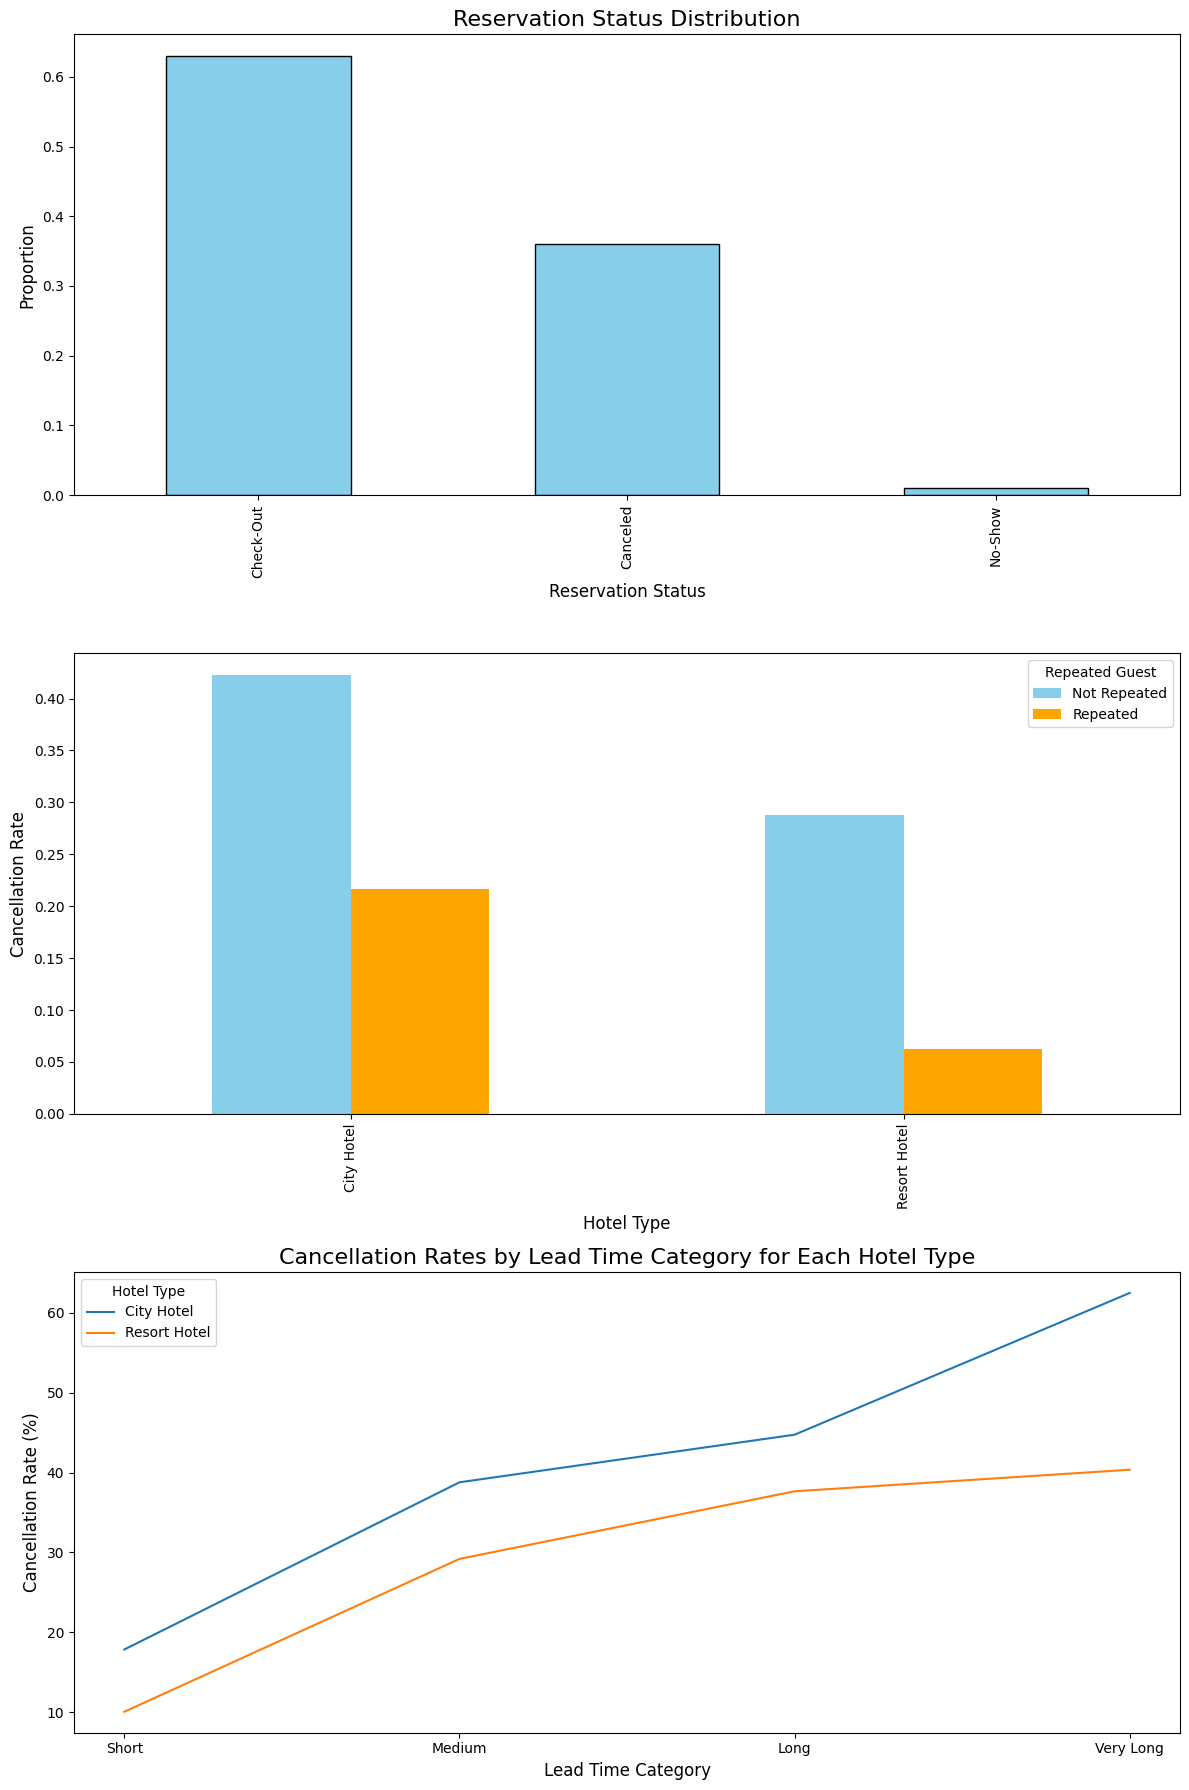

In [9]:
plt.tight_layout()
plt.show()

## Mini-Report

**Business Question:**  
What factors impact hotel booking cancellation rates?

**Relevance:**  
Understanding the key drivers of booking cancellations is important for hotel managers to optimize occupancy rates, reduce revenue loss, and allocate resources more efficiently. After identifying patterns in guest behavior and booking attributes, hotels can develop targeted strategies to minimize cancellations and improve operational planning.

**Data Justification:**  
This analysis focuses on three key attributes from the dataset: `reservation_status` (to determine overall cancellation rates), `is_repeated_guest` (to assess loyalty impact), and `lead_time` (the number of days between booking and arrival). These features were selected because they are connect closely with customer behavior and booking outcomes. Additionally, we segmented data by `hotel` type (`City Hotel` vs. `Resort Hotel`) to capture variations across different service models.

**Findings and Insights:**  
The visualization shows that approximately 37% of bookings were canceled, alsp we found City Hotels have higher cancellation rates than Resort Hotels. Repeated guests consistently cancel less often than first-time guests. Moreover, longer lead times correlate with higher cancellation rates, especially for City Hotels. These findings show that customer loyalty and booking timing significantly influence cancellations. Hotel manager could use targeted interventions—like flexible pricing for early bookings and loyalty incentives methods to help mitigate risk and improve retention.


Overall mark: 61

#### Business Question:
The business question is clearly stated and is well connected to the given dataset. The significance of answering the question is also provided. Solid evidences are presented to support the findings and implications, which are insightful for the hotel industry.

<u>Very Good</u>

#### Data:
Three variables, reservation_status, is_repeated_guest and leat_time are focues to answer the porposed question effectively. The rationale of choosing these variables are clearly explained. Appropriate data grouping and pivot table are used, which shows good skill of data manipulation. Improvements could include filtering the data before doing further analysis.

<u>Very Good</u>

#### Visualization:
Multiple plots including bar chart and solid line are employed for the visualization purpose. The plots are clear and come with essential elements of titles, axis labels and ticks. Legends are available where necessary. However, for the first reservation status distribution plot, it is suggested to replace it with a pie chart which could be more informative.

<u>Good</u>

#### Code:
The code is error-free and is easy to follow. It is suggested to separate the data analysis code from the plotting code, which could improve the readability. Although coding techniques are relatively basic, the code is well-organized.

<u>Good</u>